<a href="https://colab.research.google.com/github/devikaas2003/diabetics-prediction-using-knn/blob/main/Indian_Liver_Patient_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Indian Liver Patient Dataset (ILPD).csv")
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.shape

(583, 11)

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
TB,0
DB,0
Alkphos,0
Sgpt,0
Sgot,0
TP,0
ALB,0
A/G Ratio,4


In [ ]:
df['A/G Ratio'].fillna(df['A/G Ratio'].mode()[0],inplace=True)

/tmp/ipython-input-6-4032210590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A/G Ratio'].fillna(df['A/G Ratio'].mode()[0],inplace=True)


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
TB,0
DB,0
Alkphos,0
Sgpt,0
Sgot,0
TP,0
ALB,0
A/G Ratio,0


In [ ]:
df.size

6413

In [ ]:
X=df.iloc[:,2:10]
X

,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,34,5.9,1.6,0.37
579,0.6,0.1,98,35,31,6.0,3.2,1.10
580,0.8,0.2,245,48,49,6.4,3.2,1.00
581,1.3,0.5,184,29,32,6.8,3.4,1.00


In [ ]:
y=df.iloc[:,-1]
y

,Selector
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(466, 8)

In [ ]:
X_test.shape

(117, 8)

In [ ]:
X_train

,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
77,0.6,0.1,1620,95,127,4.6,2.1,0.80
581,1.3,0.5,184,29,32,6.8,3.4,1.00
210,0.8,0.3,190,20,14,4.1,2.4,1.40
192,2.3,0.6,272,79,51,6.6,3.5,1.10
449,0.9,0.2,173,26,27,6.2,3.1,1.00
...,...,...,...,...,...,...,...,...
71,0.8,0.2,188,20,29,4.4,1.8,0.60
106,5.3,2.3,145,32,92,5.1,2.6,1.00
270,0.7,0.2,235,96,54,9.5,4.9,1.00
435,0.5,0.1,206,28,21,7.1,4.5,1.70


In [ ]:
X_test

,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
355,1.4,0.8,178,13,26,8.0,4.6,1.30
407,1.0,0.2,719,157,108,7.2,3.7,1.00
90,5.7,2.8,214,412,850,7.3,3.2,0.78
402,0.5,0.1,162,155,108,8.1,4.0,0.90
268,14.5,6.4,358,50,75,5.7,2.1,0.50
...,...,...,...,...,...,...,...,...
516,0.9,0.3,168,16,24,6.7,3.0,0.80
305,1.4,0.7,195,36,16,7.9,3.7,0.90
167,3.0,1.5,292,64,67,5.6,1.8,0.47
312,1.3,0.6,106,25,54,8.5,4.8,1.00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_train

array([[0.00268097, 0.        , 0.76062531, ..., 0.27536232, 0.26086957,
        0.2       ],
       [0.01206434, 0.02040816, 0.05911089, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.00536193, 0.01020408, 0.06204201, ..., 0.20289855, 0.32608696,
        0.44      ],
       ...,
       [0.00402145, 0.00510204, 0.0840254 , ..., 0.98550725, 0.86956522,
        0.28      ],
       [0.00134048, 0.        , 0.06985833, ..., 0.63768116, 0.7826087 ,
        0.56      ],
       [0.00670241, 0.00510204, 0.07865169, ..., 0.60869565, 0.7173913 ,
        0.5       ]])

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.34048257e-02,  3.57142857e-02,  5.61797753e-02,
         1.50753769e-03,  3.05002033e-03,  7.68115942e-01,
         8.04347826e-01,  4.00000000e-01],
       [ 8.04289544e-03,  5.10204082e-03,  3.20468979e-01,
         7.38693467e-02,  1.97234648e-02,  6.52173913e-01,
         6.08695652e-01,  2.80000000e-01],
       [ 7.10455764e-02,  1.37755102e-01,  7.37664875e-02,
         2.02010050e-01,  1.70597804e-01,  6.66666667e-01,
         5.00000000e-01,  1.92000000e-01],
       [ 1.34048257e-03,  0.00000000e+00,  4.83634587e-02,
         7.28643216e-02,  1.97234648e-02,  7.82608696e-01,
         6.73913043e-01,  2.40000000e-01],
       [ 1.89008043e-01,  3.21428571e-01,  1.44113337e-01,
         2.01005025e-02,  1.30134201e-02,  4.34782609e-01,
         2.60869565e-01,  8.00000000e-02],
       [ 4.02144772e-03,  5.10204082e-03,  9.42843185e-02,
         5.52763819e-03,  3.86335909e-03,  8.40579710e-01,
         6.52173913e-01,  2.00000000e-01],
       [ 4.02144772e-03,  5.102040

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict=knn.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 2, 2])

In [ ]:
y_test.values

array([2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_predict)
ac

0.7350427350427351

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[70, 17],
       [14, 16]])

array([[70, 17],
       [14, 16]])

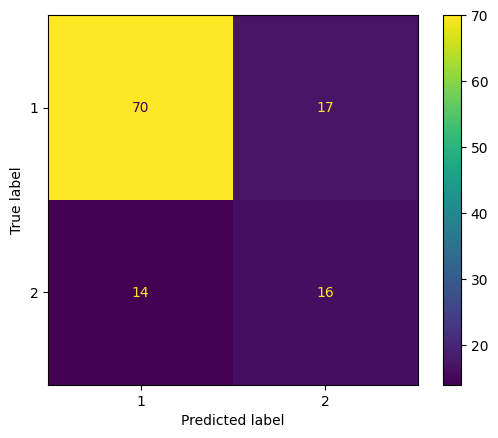

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm
from sklearn.metrics import ConfusionMatrixDisplay
cm_display=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
cm

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           1       0.83      0.80      0.82        87
           2       0.48      0.53      0.51        30

    accuracy                           0.74       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.74      0.74      0.74       117



In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SC.fit(X_train)
X_train=SC.transform(X_train)
X_train

array([[-0.42952576, -0.49523195,  5.42970658, ..., -1.75189601,
        -1.33805261, -0.48723071],
       [-0.31892322, -0.35090544, -0.43272461, ...,  0.27341273,
         0.30249034,  0.12791291],
       [-0.39792504, -0.4230687 , -0.40822978, ..., -2.21219345,
        -0.95946577,  1.35820015],
       ...,
       [-0.4137254 , -0.45915032, -0.22451849, ...,  2.75901891,
         2.19542451,  0.12791291],
       [-0.44532613, -0.49523195, -0.34291021, ...,  0.54959119,
         1.69064206,  2.28091557],
       [-0.38212467, -0.45915032, -0.2694257 , ...,  0.36547222,
         1.31205523,  1.81955786]])

In [ ]:
from sklearn.svm import SVC
sm=SVC(kernel="linear")
sm.fit(X_train,y_train)
y=sm.predict(X_train)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_predict)
ac

0.7350427350427351

In [ ]:
df['Selector'].value_counts()

,count
Selector,
1,416
2,167
